In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
x, t = dataset.data, dataset.target
x.shape, np.unique(t)

((150, 4), array([0, 1, 2]))

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier
# algorithm
model = DecisionTreeClassifier(random_state=0)
# train
model.fit(x_train, t_train)
# validation( accuracy)
#  - in Classification, 'Cross Entropy' is used as evaluation function
print(f'train score: {model.score(x_train, t_train)}')
print(f'test score: {model.score(x_test, t_test)}')

train score: 1.0
test score: 0.9777777777777777


In [12]:
# inference
model.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [13]:
!pip install graphviz

In [15]:
# visualize tree structure
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model)
graph_tree = graphviz.Source(dot_data)
# show the graph in COLAB...
# graph_tree

In [16]:
# Degree of influence
feature_importance = model.feature_importances_
feature_importance

array([0.        , 0.02150464, 0.39766951, 0.58082584])

<BarContainer object of 4 artists>

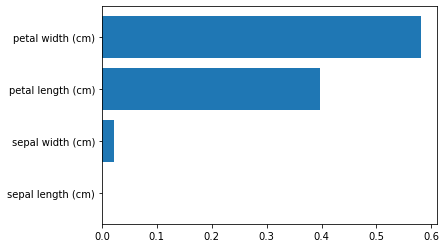

In [17]:
plt.barh(y=dataset.feature_names, width=feature_importance)

In [20]:
""" SVM(Support Vector Machine) """
# SVM uses 'distance', so data standardization is needed.
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, t_train)


print(f'train score: {model.score(x_train, t_train)}')
print(f'test score: {model.score(x_test, t_test)}')

train score: 0.9714285714285714
test score: 0.9777777777777777


In [23]:
# standardization( into mean: 0, std: 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_stsc = scaler.transform(x_train)
x_test_stsc = scaler.transform(x_test)

round(x_train.mean()), round(x_train.std()), round(x_train_stsc.mean()), round(x_train_stsc.std())

(3, 2, 0, 1)

In [26]:
# C: cost(penalty), gamma: complexity of a model
model_stsc = SVC(C=1, gamma=1.0)
model_stsc.fit(x_train_stsc, t_train)


print(f'train score: {model_stsc.score(x_train_stsc, t_train)}')
print(f'test score: {model_stsc.score(x_test_stsc, t_test)}')

train score: 0.9809523809523809
test score: 0.9777777777777777
